In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
X = df.drop("sales" , axis = 1)
y = df["sales"]

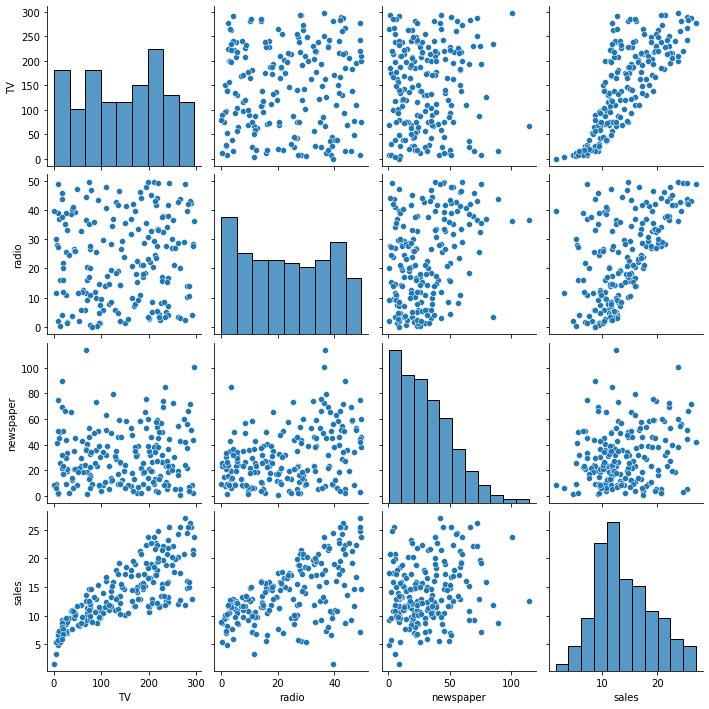

In [6]:
sns.pairplot(df);

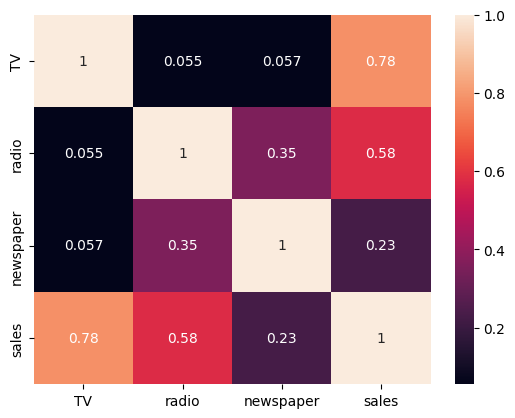

In [7]:
sns.heatmap(df.corr() , annot = True);

In [8]:
# PolyFeatures. (Optional)
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_converter = PolynomialFeatures(degree = 4 , include_bias = False )

In [10]:
X = poly_converter.fit_transform(X)

In [11]:
X.shape

(200, 34)

## Train | Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state=53)

## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
X_test_scaled = scaler.transform(X_test)

## Model Creating

In [18]:
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet , RidgeCV , LassoCV , ElasticNetCV

In [19]:
lr = LinearRegression()
rdg = Ridge()
ls = Lasso(alpha = 0.005 , max_iter = 100000)
els = ElasticNet()

In [20]:
lr.fit(X_train_scaled , y_train)

LinearRegression()

In [21]:
rdg.fit(X_train_scaled , y_train)

Ridge()

In [22]:
ls.fit(X_train_scaled , y_train)

Lasso(alpha=0.005, max_iter=100000)

In [23]:
els.fit(X_train_scaled , y_train)

ElasticNet()

In [24]:
lr_pred = lr.predict(X_test_scaled)
rdg_pred = rdg.predict(X_test_scaled)
ls_pred = ls.predict(X_test_scaled)
els_pred = els.predict(X_test_scaled)

In [25]:
lr_train_pred = lr.predict(X_train_scaled)
rdg_train_pred = rdg.predict(X_train_scaled)
ls_train_pred = ls.predict(X_train_scaled)
els_train_pred = els.predict(X_train_scaled)

## Model Scores

In [26]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [28]:
lr_df = train_val(y_train , lr_train_pred , y_test , lr_pred , "Linear" )
lr_df

,Linear_train,Linear_test
R2,0.997009,0.965851
mae,0.228759,0.571292
mse,0.080942,0.888513
rmse,0.284503,0.942610


In [29]:
rdg_df = train_val(y_train , rdg_train_pred , y_test , lr_pred , "Ridge" )
rdg_df

,Ridge_train,Ridge_test
R2,0.988197,0.965851
mae,0.371170,0.571292
mse,0.319458,0.888513
rmse,0.565206,0.942610


In [30]:
ls_df = train_val(y_train , ls_train_pred , y_test , ls_pred , "Lasso" )
ls_df

,Lasso_train,Lasso_test
R2,0.991144,0.983584
mae,0.320672,0.449852
mse,0.239705,0.427127
rmse,0.489597,0.653550


In [31]:
els_df = train_val(y_train , els_train_pred , y_test , els_pred , "ElasticNet" )
els_df

,ElasticNet_train,ElasticNet_test
R2,0.903881,0.860571
mae,1.234270,1.404884
mse,2.601591,3.627717
rmse,1.612945,1.904657


In [32]:
scores = pd.concat([lr_df , rdg_df , ls_df , els_df] , axis = 1)
scores

,Linear_train,Linear_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,ElasticNet_train,ElasticNet_test
R2,0.997009,0.965851,0.988197,0.965851,0.991144,0.983584,0.903881,0.860571
mae,0.228759,0.571292,0.371170,0.571292,0.320672,0.449852,1.234270,1.404884
mse,0.080942,0.888513,0.319458,0.888513,0.239705,0.427127,2.601591,3.627717
rmse,0.284503,0.942610,0.565206,0.942610,0.489597,0.653550,1.612945,1.904657


## Model Performance Upgrade

In [33]:
from sklearn.model_selection import cross_validate , cross_val_score

In [34]:
lr_scores = cross_validate(lr, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [35]:
lr_scores = pd.DataFrame(lr_scores)

In [36]:
lr_scores = lr_scores.iloc[:,2:].mean()
lr_scores

test_r2                             0.964996
test_neg_mean_absolute_error       -0.462883
test_neg_mean_squared_error        -1.168113
test_neg_root_mean_squared_error   -0.803227
dtype: float64

In [37]:
lr_scores_cv = pd.DataFrame(lr_scores , columns = ["lr_scores_cv"])
lr_scores_cv

,lr_scores_cv
test_r2,0.964996
test_neg_mean_absolute_error,-0.462883
test_neg_mean_squared_error,-1.168113
test_neg_root_mean_squared_error,-0.803227


In [38]:
lr_coef = lr.coef_
lr_coef

array([ 10.6131208 ,  -0.26151961,   0.82195996, -26.60502343,
         5.60376341,  -0.66237922,   1.74533102,   1.85389482,
        -4.09011458,  28.8102953 ,   0.37620924,  -0.35103016,
        -3.06170546,  -3.299584  ,   2.59995798,  -3.70570102,
         8.32207368, -12.82066017,  11.15770847, -11.28356898,
         0.35125961,   0.46986908,  -3.3530528 ,   3.47189724,
        -1.87254303,   6.45622881,  -6.35015094,   6.94530695,
        -3.47650275,  -0.35585253,  -1.80769276,   2.71086123,
         1.01118405,  -4.14695115])

In [39]:
lr_coef_df = pd.DataFrame(lr_coef , columns = ['lr_coef'])
lr_coef_df

,lr_coef
0,10.613121
1,-0.261520
2,0.821960
3,-26.605023
4,5.603763
5,-0.662379
6,1.745331
7,1.853895
8,-4.090115
9,28.810295


In [40]:
rdg_scores = cross_validate(rdg , X_train_scaled , y_train ,
                            scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [41]:
rdg_scores = pd.DataFrame(rdg_scores)

In [42]:
rdg_scores = rdg_scores.iloc[:,2:].mean()
rdg_scores

test_r2                             0.976126
test_neg_mean_absolute_error       -0.477382
test_neg_mean_squared_error        -0.671756
test_neg_root_mean_squared_error   -0.738856
dtype: float64

In [43]:
rdg_scores_cv = pd.DataFrame(rdg_scores , columns = ["rdg_scores_cv"])
rdg_scores_cv

,rdg_scores_cv
test_r2,0.976126
test_neg_mean_absolute_error,-0.477382
test_neg_mean_squared_error,-0.671756
test_neg_root_mean_squared_error,-0.738856


In [44]:
rdg_coef = rdg.coef_

In [45]:
rdg_coef_df = pd.DataFrame(rdg_coef , columns = ["rdg_coef"])
rdg_coef_df

,rdg_coef
0,3.102465
1,0.485698
2,-0.153272
3,-1.203086
4,3.132692
5,0.363530
6,-0.469584
7,0.449850
8,-0.231833
9,-0.897417


In [46]:
ls_scores = cross_validate(ls , X_train_scaled , y_train,
                           scoring=['r2' , 'neg_mean_absolute_error' , 'neg_mean_squared_error' , 'neg_root_mean_squared_error'] , cv = 5)

In [47]:
ls_scores = pd.DataFrame(ls_scores)

In [48]:
ls_scores = ls_scores.iloc[:,2:].mean()
ls_scores

test_r2                             0.985051
test_neg_mean_absolute_error       -0.382897
test_neg_mean_squared_error        -0.404394
test_neg_root_mean_squared_error   -0.590228
dtype: float64

In [49]:
ls_scores_cv = pd.DataFrame(ls_scores , columns = ["ls_scores_cv"])
ls_scores_cv

,ls_scores_cv
test_r2,0.985051
test_neg_mean_absolute_error,-0.382897
test_neg_mean_squared_error,-0.404394
test_neg_root_mean_squared_error,-0.590228


In [50]:
ls_coef = ls.coef_
ls_coef

array([ 4.79118197e+00, -0.00000000e+00,  0.00000000e+00, -4.59145700e+00,
        4.89883095e+00, -0.00000000e+00, -1.48359432e-01,  2.97092717e-01,
       -0.00000000e+00, -0.00000000e+00, -6.43927451e-01, -0.00000000e+00,
        0.00000000e+00, -4.22722180e-01,  0.00000000e+00, -5.82430359e-02,
        2.99524103e-01, -0.00000000e+00, -0.00000000e+00,  1.26724000e+00,
       -0.00000000e+00,  1.49889981e-02, -3.89785426e-02, -0.00000000e+00,
        1.92211306e-02,  4.01925860e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  5.16274471e-02, -0.00000000e+00,
       -8.79069610e-02, -1.04757472e-03])

In [51]:
ls_coef_df = pd.DataFrame(ls_coef , columns = ['ls_coef'])
ls_coef_df

,ls_coef
0,4.791182
1,-0.000000
2,0.000000
3,-4.591457
4,4.898831
5,-0.000000
6,-0.148359
7,0.297093
8,-0.000000
9,-0.000000


In [52]:
els_scores = cross_validate(els , X_train_scaled , y_train,
                           scoring=['r2' , 'neg_mean_absolute_error' , 'neg_mean_squared_error' , 'neg_root_mean_squared_error'] , cv = 5)

In [53]:
els_scores = pd.DataFrame(els_scores)

In [54]:
els_scores = els_scores.iloc[:,2:].mean()
els_scores

test_r2                             0.896910
test_neg_mean_absolute_error       -1.275864
test_neg_mean_squared_error        -2.812164
test_neg_root_mean_squared_error   -1.628131
dtype: float64

In [55]:
els_scores_cv = pd.DataFrame(els_scores , columns = ["els_scores_cv"])
els_scores_cv

,els_scores_cv
test_r2,0.896910
test_neg_mean_absolute_error,-1.275864
test_neg_mean_squared_error,-2.812164
test_neg_root_mean_squared_error,-1.628131


In [56]:
els.coef_

array([0.80472963, 0.16085626, 0.        , 0.30485744, 0.97488467,
       0.02256747, 0.        , 0.        , 0.        , 0.        ,
       0.53975393, 0.        , 0.6513831 , 0.15332692, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20659643, 0.        , 0.32809708, 0.        , 0.        ,
       0.42321724, 0.06287159, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [57]:
els_coef_df = pd.DataFrame(els.coef_ , columns = ["els_coef"])
els_coef_df 

,els_coef
0,0.804730
1,0.160856
2,0.000000
3,0.304857
4,0.974885
5,0.022567
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [58]:
coefs = pd.concat([lr_coef_df , rdg_coef_df , ls_coef_df , els_coef_df] , axis = 1)
coefs

,lr_coef,rdg_coef,ls_coef,els_coef
0,10.613121,3.102465,4.791182,0.804730
1,-0.261520,0.485698,-0.000000,0.160856
2,0.821960,-0.153272,0.000000,0.000000
3,-26.605023,-1.203086,-4.591457,0.304857
4,5.603763,3.132692,4.898831,0.974885
5,-0.662379,0.363530,-0.000000,0.022567
6,1.745331,-0.469584,-0.148359,0.000000
7,1.853895,0.449850,0.297093,0.000000
8,-4.090115,-0.231833,-0.000000,0.000000
9,28.810295,-0.897417,-0.000000,0.000000


In [59]:
scores_cv = pd.concat([lr_scores_cv , rdg_scores_cv , ls_scores_cv , els_scores_cv] , axis = 1)
scores_cv

,lr_scores_cv,rdg_scores_cv,ls_scores_cv,els_scores_cv
test_r2,0.964996,0.976126,0.985051,0.896910
test_neg_mean_absolute_error,-0.462883,-0.477382,-0.382897,-1.275864
test_neg_mean_squared_error,-1.168113,-0.671756,-0.404394,-2.812164
test_neg_root_mean_squared_error,-0.803227,-0.738856,-0.590228,-1.628131


In [ ]:
# scores Scores before.

## Choosing best alpha's for Ridge,Lasso,ElasticNet

In [ ]:
from sklearn.linear_model import RidgeCV , LassoCV , ElasticNetCV

In [ ]:
alphas = np.linspace(0.01, 1 , 100)
alphas

In [ ]:
l1_ratios = np.linspace(0.001, 0.01, 100)
l1_ratios

In [ ]:
rdg_cv = RidgeCV(alphas=alphas , cv = 5 , scoring = 'neg_root_mean_squared_error' )

In [ ]:
rdg_cv.fit(X_train_scaled , y_train)

In [ ]:
rdg_cv.alpha_

In [ ]:
ls_cv = LassoCV(alphas = alphas , cv = 5 , max_iter = 1000000 , random_state = 53)

In [ ]:
ls_cv.fit(X_train_scaled , y_train)

In [ ]:
ls_cv.alpha_

In [ ]:
els_cv = ElasticNetCV(alphas = alphas , l1_ratio = l1_ratios , cv = 5 ,max_iter = 10000000 , random_state = 53)

In [ ]:
els_cv.fit(X_train_scaled , y_train)

In [ ]:
els_cv.alpha_

In [ ]:
els_cv.l1_ratio_

In [ ]:
rdg_cv_train_predict = rdg_cv.predict(X_train_scaled)
ls_cv_train_predict = ls_cv.predict(X_train_scaled)
els_cv_train_predict = els_cv.predict(X_train_scaled)

rdg_cv_predict = rdg_cv.predict(X_test_scaled)
ls_cv_predict = ls_cv.predict(X_test_scaled)
els_cv_predict = els_cv.predict(X_test_scaled)

In [ ]:
rdg_cv_scores = train_val(y_train , rdg_cv_train_predict , y_test , rdg_cv_predict , "Ridge" )
rdg_cv_scores

In [ ]:
ls_cv_scores = train_val(y_train , ls_cv_train_predict , y_test , ls_cv_predict , "Lasso" )
ls_cv_scores

In [ ]:
els_cv_scores = train_val(y_train , els_cv_train_predict , y_test , els_cv_predict , "ElasticNet" )
els_cv_scores

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ls = Lasso(max_iter = 100000 , random_state = 53)

In [ ]:
params_alpha = {"alpha" : np.linspace(0.001,0.1,100),}

In [ ]:
grid_model = GridSearchCV(ls , params_alpha , scoring = 'neg_root_mean_squared_error' , cv = 5 , verbose = 2)

In [ ]:
grid_model.fit(X_train_scaled , y_train)

In [ ]:
grid_model.best_params_

In [ ]:
els = ElasticNet(max_iter = 1000000 , random_state=53)

In [ ]:
params = {"alpha" : np.linspace(0.001,0.1,100),
          "l1_ratio" : np.linspace(0.01,1 , 100)}

In [ ]:
grid_model = GridSearchCV(els , params , scoring = 'neg_root_mean_squared_error' , cv = 5 , verbose = 2)

In [ ]:
grid_model.fit(X_train_scaled,y_train)

In [ ]:
grid_model.best_params_ # Lasso with 0.005 alpha is the best.